In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

Read .csv file, transform it and write to output .csv

In [5]:
df = pd.read_csv("dataset.csv")
df.replace(np.nan, 0, inplace=True)
df["Oblast"] = df["Oblast"].replace(r"[^\w\s]", "", regex=True)

df.drop_duplicates(subset=["Oblast"], keep="first", inplace=True, ignore_index=False)
df.sort_values(by=["Livelihood_Score"], ascending=False, inplace=True)

bins = [0, 50, 75, float("inf")]
labels = ["Low", "Medium", "High"]
cut = pd.cut(df["Livelihood_Score"], bins=bins, labels=labels, right=False)
df["Severity"] = cut
df.reset_index(drop=True, inplace=True)
df.index += 1
df.to_csv("output_files/output_dataset.csv")


Set up bar plot, draw it and save as .jpg

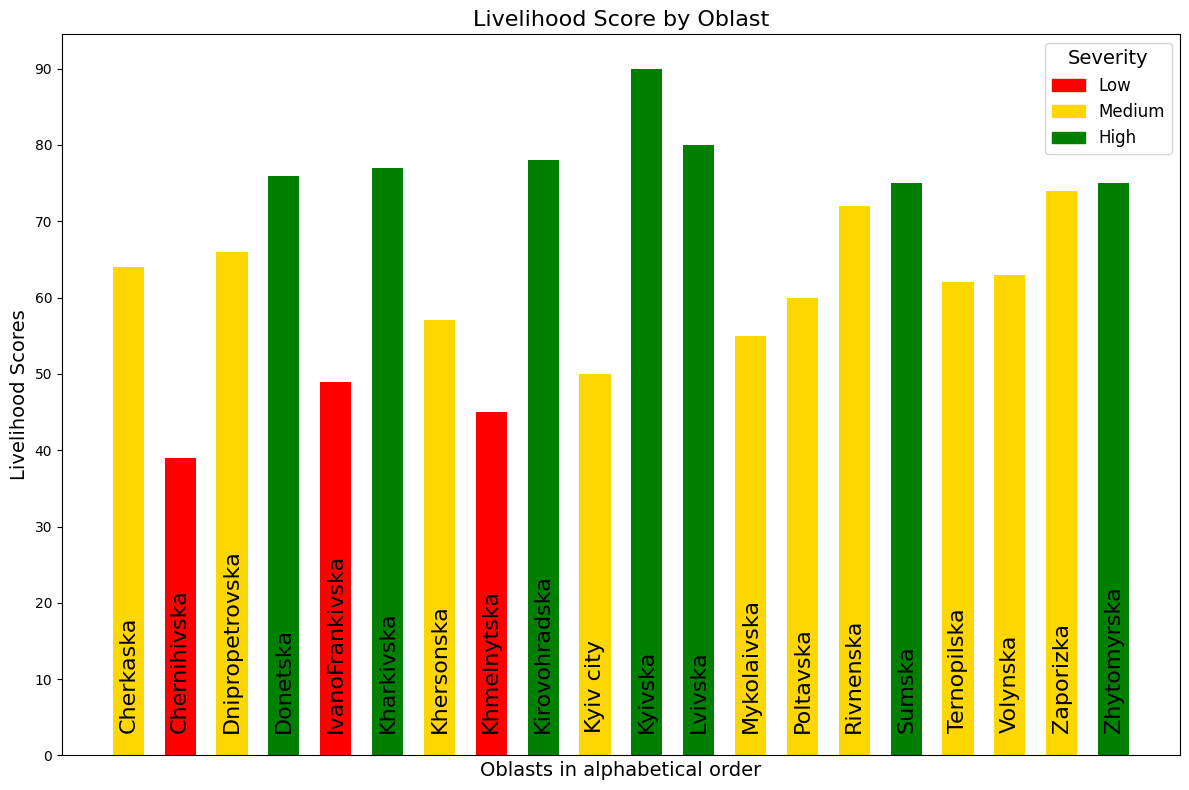

In [6]:
# Adapt dataframe for the bar plot
df_bar = df.replace(0, np.nan)
df_bar.dropna(inplace=True)
df_bar.sort_values(by=["Oblast"], inplace=True)

# Create plot and bars
fig, ax = plt.subplots(figsize=(12, 8))
colors = {"Low": "red", "Medium": "gold", "High": "green"}
bars = ax.bar(
    df_bar["Oblast"], 
    df_bar["Livelihood_Score"], 
    color=df_bar["Severity"].map(colors),
    width=0.6
)

# Place text inside bars
for bar, name in zip(bars, df_bar["Oblast"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 3, name, 
        ha="center", va="bottom",
        color="black", fontsize=16, rotation=90
    )

#Set labels and ticks
ax.set_xlabel("Oblasts in alphabetical order", fontsize=14)
ax.set_ylabel("Livelihood Scores", fontsize=14)
ax.set_title("Livelihood Score by Oblast", fontsize=16)
ax.set_xticks([])
ax.set_yticks(np.arange(0, int(max(df["Livelihood_Score"])) + 10, 10))

handles = [patches.Patch(color=color, label=label) for label, color in colors.items()]
ax.legend(
    prop={"size": 12}, 
    handles=handles, 
    title="Severity", 
    title_fontsize=14 
)

plt.tight_layout()
plt.savefig("output_files/livelihood_score_by_oblast.jpg")
plt.show()